In [20]:
import pandas as pd
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=360)
from pytrends import dailydata
from functools import reduce
import numpy as np

In [8]:
#Loading google trends data daily
start_year=2019
start_month=1
end_year=2020
end_month=6
keywords=['virus','crisis']
df_list=[]
for keyword in keywords:
    df_tmp = dailydata.get_daily_data(keyword, start_year, start_month, end_year, end_month, geo = 'US')
    df_list.append(df_tmp[keyword].to_frame())

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['date'],
                                            how='outer'), df_list)

# 
# pytrends.build_payload(['virus'], cat=0, timeframe='today 5-y', geo='', gprop='')

virus:2019-01-01 2019-01-31
virus:2019-02-01 2019-02-28
virus:2019-03-01 2019-03-31
virus:2019-04-01 2019-04-30
virus:2019-05-01 2019-05-31
virus:2019-06-01 2019-06-30
virus:2019-07-01 2019-07-31
virus:2019-08-01 2019-08-31
virus:2019-09-01 2019-09-30
virus:2019-10-01 2019-10-31
virus:2019-11-01 2019-11-30
virus:2019-12-01 2019-12-31
virus:2020-01-01 2020-01-31
virus:2020-02-01 2020-02-29
virus:2020-03-01 2020-03-31
virus:2020-04-01 2020-04-30
virus:2020-05-01 2020-05-31
virus:2020-06-01 2020-06-30
crisis:2019-01-01 2019-01-31
crisis:2019-02-01 2019-02-28
crisis:2019-03-01 2019-03-31
crisis:2019-04-01 2019-04-30
crisis:2019-05-01 2019-05-31
crisis:2019-06-01 2019-06-30
crisis:2019-07-01 2019-07-31
crisis:2019-08-01 2019-08-31
crisis:2019-09-01 2019-09-30
crisis:2019-10-01 2019-10-31
crisis:2019-11-01 2019-11-30
crisis:2019-12-01 2019-12-31
crisis:2020-01-01 2020-01-31
crisis:2020-02-01 2020-02-29
crisis:2020-03-01 2020-03-31
crisis:2020-04-01 2020-04-30
crisis:2020-05-01 2020-05-31
cri

In [6]:
# result=pytrends.interest_over_time()

<AxesSubplot:xlabel='date'>

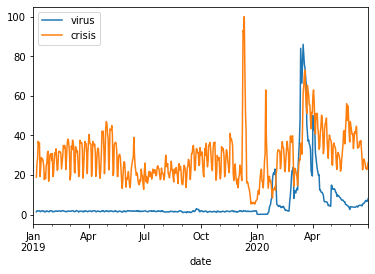

In [10]:
df_merged.plot()

In [16]:
import yfinance as yf
vix_obj = yf.Ticker("^VIX")
df_vix = vix_obj.history(period="max")
df_vix=df_vix['Close'].to_frame()
df_vix.rename(columns={'Close':'VIX'},inplace=True)

<AxesSubplot:xlabel='Date'>

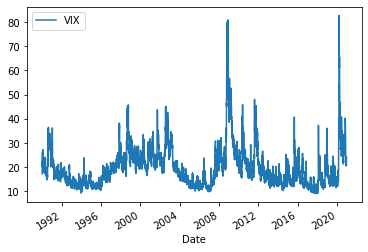

In [19]:
df_vix.plot()

In [21]:
df_vix['VIX_stat']=np.log(df_vix['VIX'])-np.log(df_vix['VIX'].shift(1))
df_vix.dropna(inplace=True)

<AxesSubplot:xlabel='Date'>

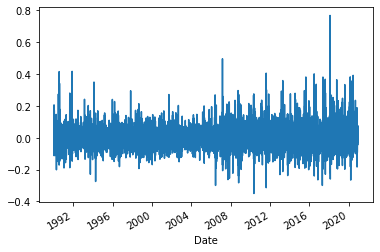

In [23]:
df_vix['VIX_stat'].plot()

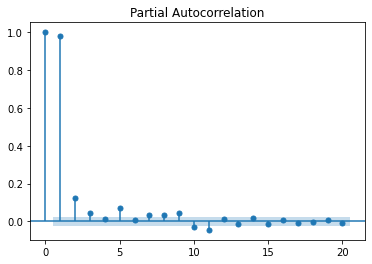

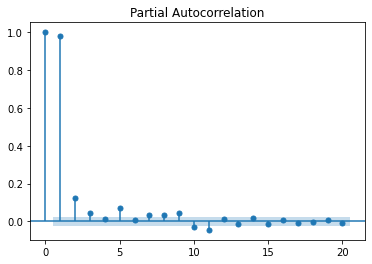

In [30]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
plot_pacf(df_vix['VIX'], lags=20)

In [29]:
import armagarch as ag
meanMdl = ag.ARMA(order = {'AR':3,'MA':1})
volMdl = ag.garch(order = {'p':1,'q':1})
distMdl = ag.normalDist()
model = ag.empModel(df_vix['VIX_stat'].to_frame(), meanMdl, volMdl, distMdl)
model.fit()

C:\Programming\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Programming\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprec

                                             ARMA-GARCH estimation results                                              
Dep Variable:                                    VIX_stat    R-squared:                                           0.02
Mean Model:                                          ARMA    Adj. R-squared:                                      0.02
Vol Model:                                          GARCH    Log Likelihood:                                  10039.92
Distribution:                                    Gaussian    AIC:                                            -20063.84
Method:                                                ML    BIC:                                            -20008.14
                                                             Num obs:                                             7799
Date:                                    Mon, Dec 14 2020    Df Residuals:                                        7792
Time:                                         

In [42]:
from statsmodels.tsa.arima.model import ARIMA
model_arma=ARIMA(endog=df_vix['VIX'],order=(5,1,2)).fit()
predictions=model_arma.predict()


C:\Programming\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Programming\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Programming\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [43]:
model_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    VIX   No. Observations:                 7799
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -14786.202
Date:                Mon, 14 Dec 2020   AIC                          29588.405
Time:                        19:50:40   BIC                          29644.098
Sample:                             0   HQIC                         29607.492
                               - 7799                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0260      0.131      0.198      0.843      -0.230       0.282
ar.L2          0.3811      0.058      6.617      0.000       0.268       0.494
ar.L3          0.0393      0.008      4.831      0.000       0.023       0.055
ar.L4         -0.0515      0.006     -7.987      0.000      -0.064      -0.039
ar.L5          0.0043      0.011      0.376      0.707      -0.018       0.027
ma.L1         -0.1724      0.131     -1.320      0.187      -0.428       0.084
ma.L2         -0.4212      0.073     -5.733      0.000      -0.565      -0.277
sigma2         2.5971      0.012    210.255      0.000       2.573       2.621
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            267355.35
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.28   Skew:                             2.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

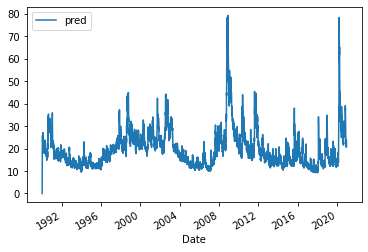

In [44]:
df_vix['pred']=predictions
df_vix[['pred']].plot()